# SMAI Assignment - 3

## Question - `1` : Support Vector Machines

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

This section is divided into 2 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the second subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [ ]:
# !pip install numpy
# !pip install matplotlib
# !pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### Subsection 1

In [ ]:
# Helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

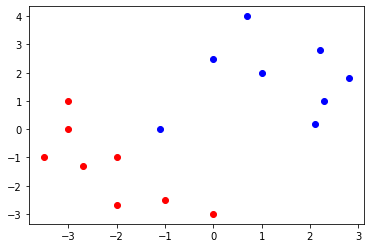

array([[-3.5, -1. ],
       [-3. ,  0. ],
       [-3. ,  1. ],
       [-2.7, -1.3],
       [-2. , -1. ],
       [-2. , -2.7],
       [-1. , -2.5],
       [ 0. , -3. ],
       [-1.1,  0. ],
       [ 0. ,  2.5],
       [ 1. ,  2. ],
       [ 0.7,  4. ],
       [ 2.1,  0.2],
       [ 2.3,  1. ],
       [ 2.8,  1.8],
       [ 2.2,  2.8]])

In [ ]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()
X

In the next cell you are required to find the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles (check the svm slides uploaded in the portal). Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

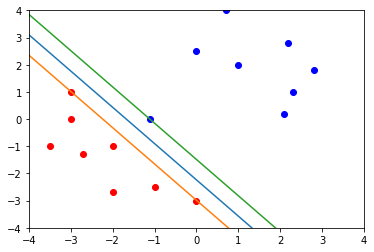

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Define the data points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7],
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4],
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

# Define the problem variables
w = cp.Variable(2)
b = cp.Variable()

# Define the objective function
objective = cp.Minimize(cp.sum_squares(w) / 2)

# Define the constraints
constraints = []
for i in range(X.shape[0]):
    constraints.append(y[i] * (X[i] @ w + b) >= 1)

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Compute the decision boundary
slope = -w[0].value / w[1].value
intercept = -b.value / w[1].value

# Plot the data points and the decision boundary
plt.figure()
plot_points(X, y)
plt.plot(np.linspace(-4, 4), slope * np.linspace(-4, 4) + intercept)
plt.plot(np.linspace(-4, 4), slope * np.linspace(-4, 4) + intercept-0.75)
plt.plot(np.linspace(-4, 4), slope * np.linspace(-4, 4) + intercept+0.75)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines.

Create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
def SoftSVM(C):
  # Define the problem variables
  w = cp.Variable(2)
  b = cp.Variable()
  xi = cp.Variable(X.shape[0])
  objective = cp.Minimize(cp.sum_squares(w) / 2 + C * cp.sum(xi))
  constraints = []
  for i in range(X.shape[0]):
      constraints.append(y[i] * (X[i] @ w + b) >= 1 - xi[i])
      constraints.append(xi[i] >= 0)
  problem = cp.Problem(objective, constraints)
  problem.solve()
  slope = -w[0].value / w[1].value
  intercept = -b.value / w[1].value
  print("Slope : ",slope)
  print("Intercept : ",intercept)
  return w.value,b.value

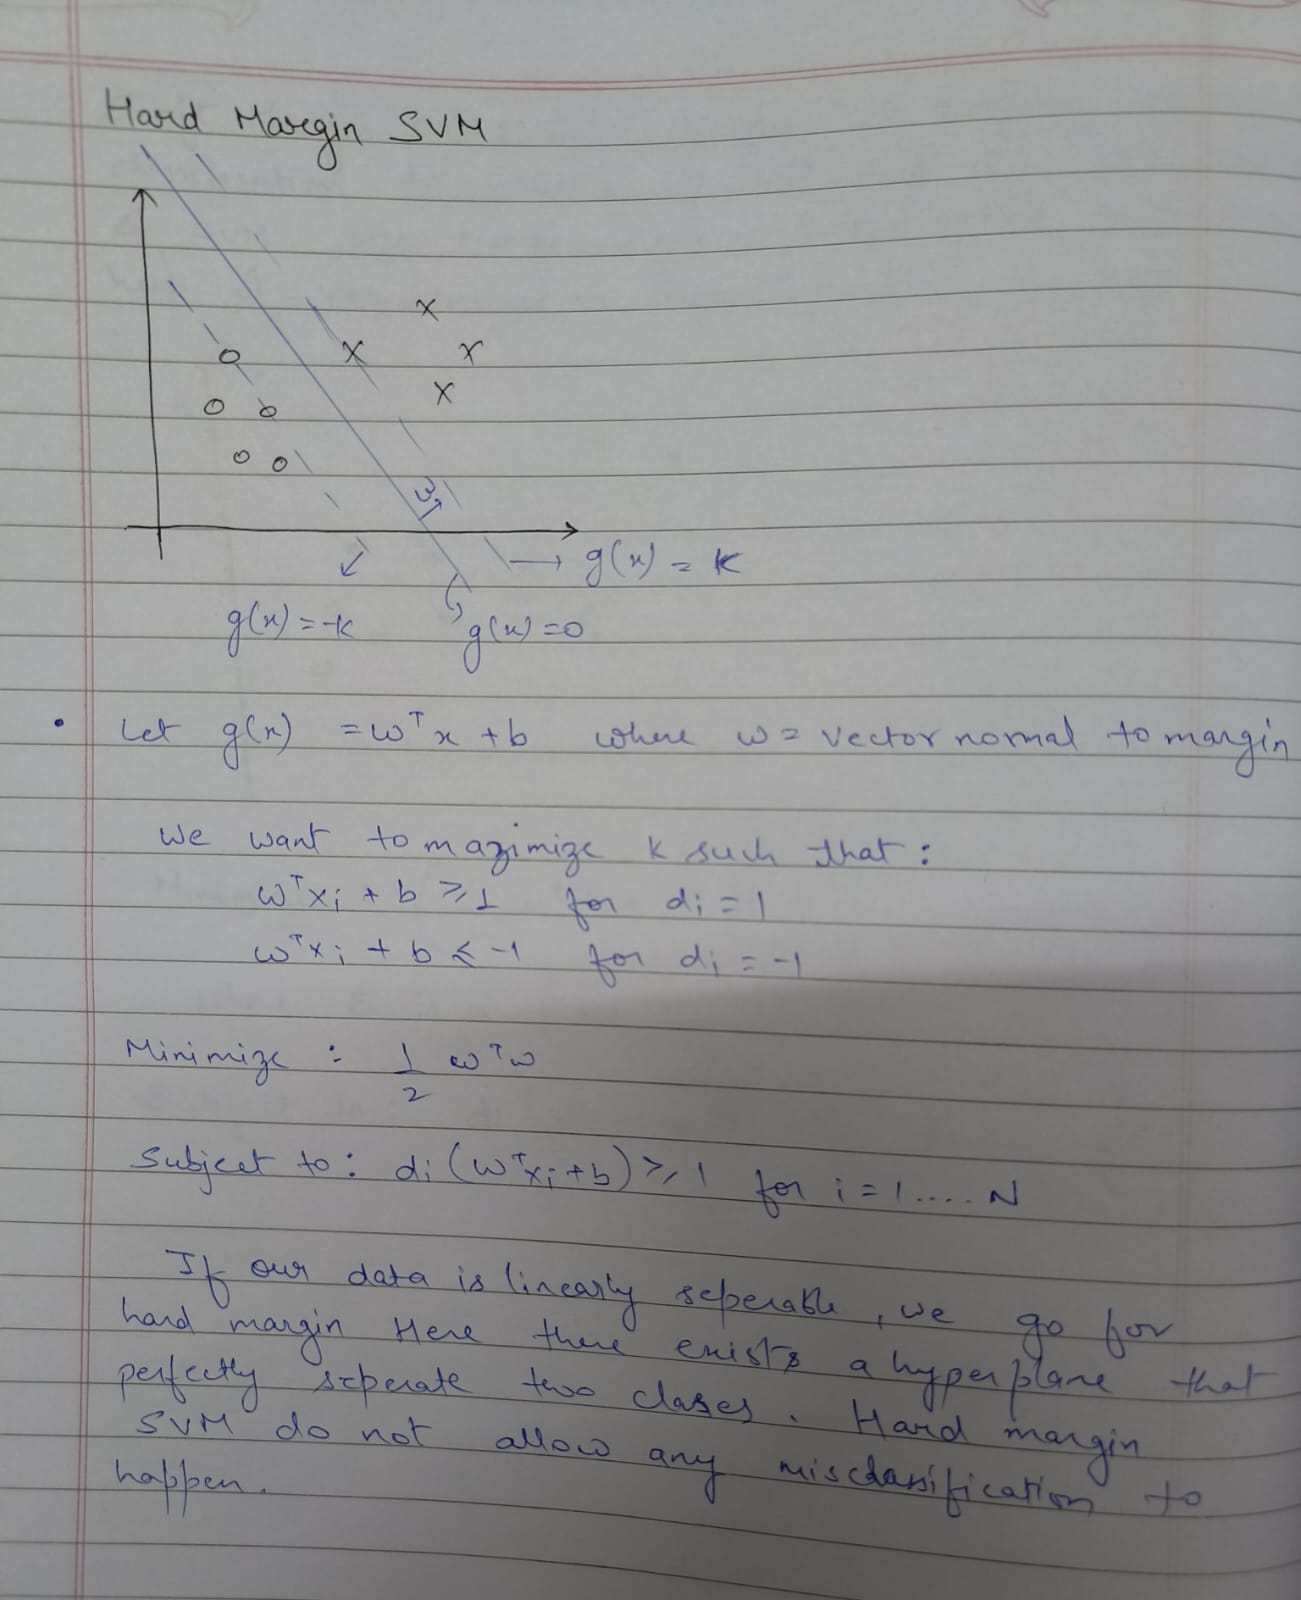

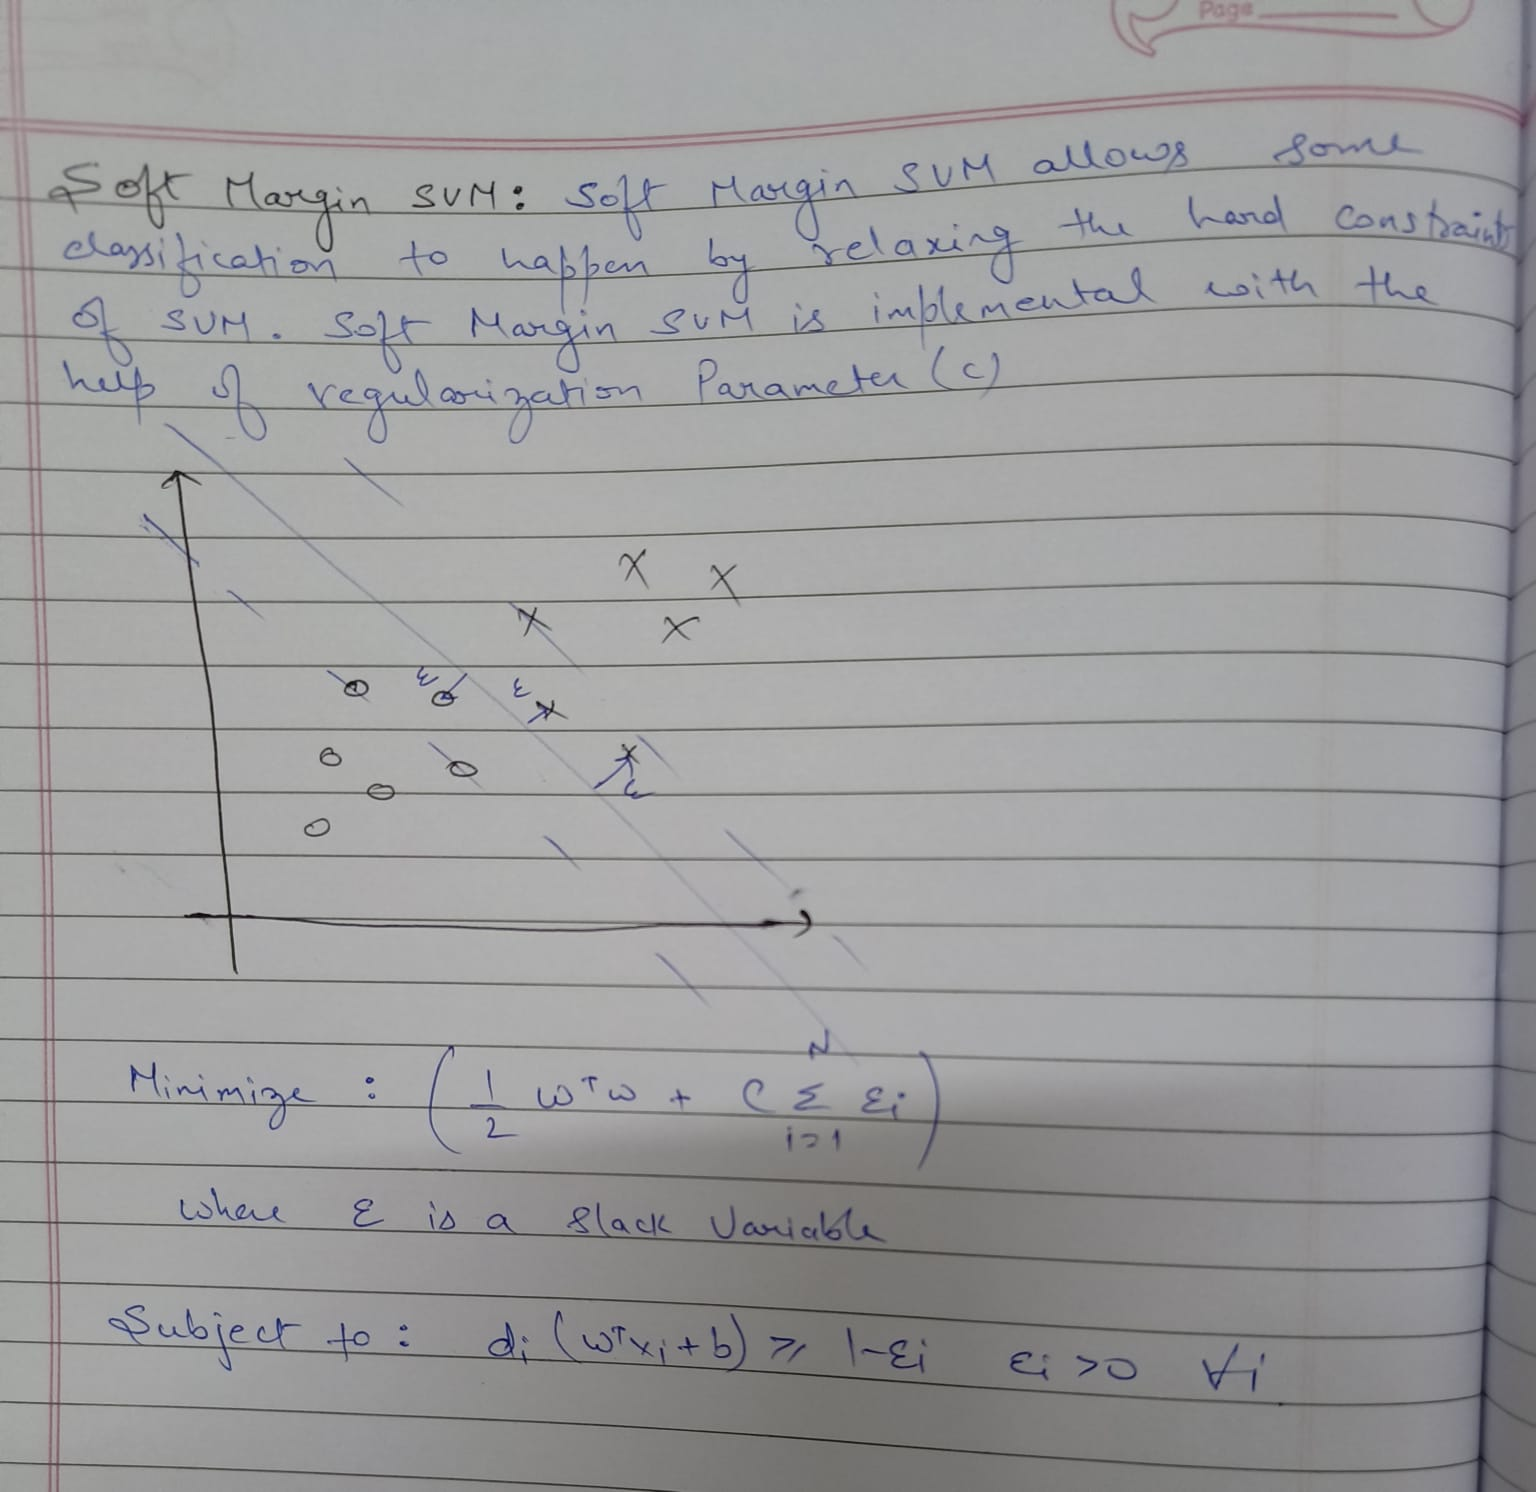

In [ ]:
def plotLine(X, Y, w, b):
  reds = []
  blues = []
  for i in range(Y.shape[0]):
      if Y[i] == 1:
          reds.append(X[i])
      else:
          blues.append(X[i])
  reds = np.array(reds)
  blues = np.array(blues)
  plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
  plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

  x = np.linspace(-5, 5, 20)
  x0 = w[0]
  x1 = w[1]

  y1 = (-(x0*x) - b)/x1
  y2 = (-(x0*x) - b + 1)/x1
  y3 = (-(x0*x) - b - 1)/x1

  plt.plot(x, y1, 'm')
  plt.plot(x, y2, 'g')
  plt.plot(x, y3, 'c')

Slope :  -1.333333333333333
Intercept :  -1.1884057971014508


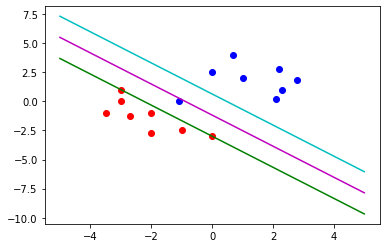

In [ ]:
w,b=SoftSVM(1)
plotLine(X,y,w,b)

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Plot it. Explain your observations theoretically.

In [ ]:
# Re-create the Synthetic Data by adding the points and visualize the points
X = np.append(X, [[-4,-10],[4,4]],axis=0)
y = np.append(y,[1,-1],axis=0)

Slope :  -1.333333333333333
Intercept :  -1.1884057971014483


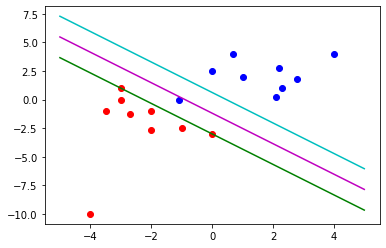

In [ ]:
w,b=SoftSVM(1)
plotLine(X,y,w,b)

In [ ]:
# Solve for the decision boundary using this modified dataset

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

Slope :  -1.1333333333333346
Intercept :  0.06884643644378939


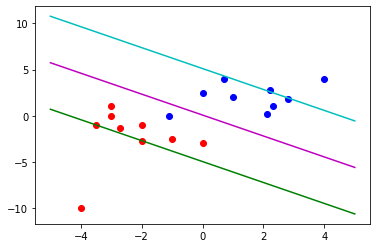

In [ ]:
# Write your code here for C= 0.01
w,b=SoftSVM(0.01)
plotLine(X,y,w,b)

Slope :  -1.0952380952380951
Intercept :  -0.345238095238095


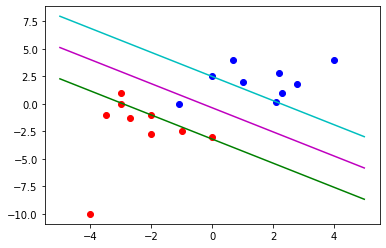

In [ ]:
# Write your code here for C= 0.1
w,b=SoftSVM(0.1)
plotLine(X,y,w,b)

Slope :  -1.3333333333333333
Intercept :  -2.2333333333333334


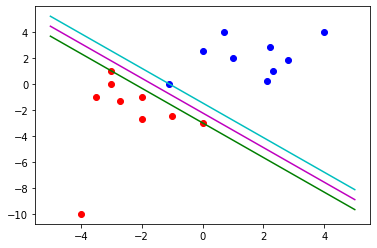

In [ ]:
# Write your code here for C= 3
w,b=SoftSVM(3)
plotLine(X,y,w,b)

Slope :  -1.3333333333333333
Intercept :  -2.2333333333333334


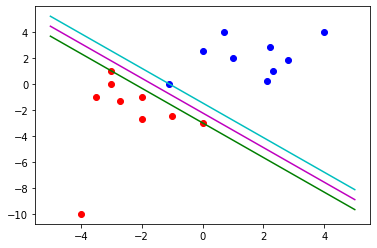

In [ ]:
# Write your code here for C= 10
w,b=SoftSVM(10)
plotLine(X,y,w,b)

Slope :  -1.3333333333333333
Intercept :  -2.2333333333333334


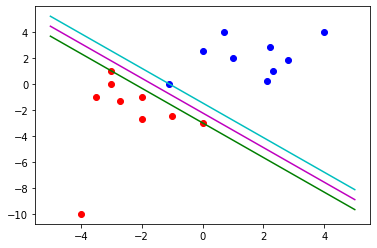

In [ ]:
# Write your code here for C= 100
w,b=SoftSVM(100)
plotLine(X,y,w,b)

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why?

Slope :  -1.333333333333333
Intercept :  -0.24999999999999956


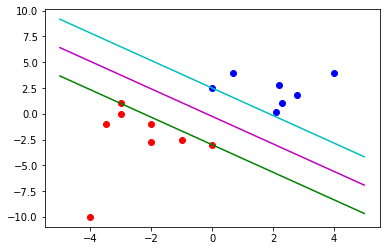

In [ ]:
# Write your Code here
Xn = X
yn = y
X = np.delete(Xn, [3,8,10], axis=0)
y = np.delete(yn, [3,8,10])

w, b = SoftSVM(100)
plotLine(X,y,w,b)

### Subsection 2

In [ ]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-03-23 11:12:03--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2023-03-23 11:12:03 (91.3 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-03-23 11:12:04--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Len

In [ ]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [ ]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [ ]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels (Linear, Polynomial, RBF, Sigmoid) for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [ ]:
# use this subset of data for training and testing

batch = 3000
X_train = images_train[:batch,:]
y_train = labels_train[:batch]

X_test = images_test[batch:2*batch,:]
y_test = labels_test[batch:2*batch]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000, 784)
(3000,)
(3000, 784)
(3000,)


In [ ]:
from sklearn.svm import *
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [ ]:
def linearSVM():
  svm = SVC(C=1,kernel='linear' )
  svm.fit(X_train, y_train)

  y_pred = svm.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  conf_mat = confusion_matrix(y_test, y_pred)

  print("Linear SVM Results:")
  print("Accuracy:", accuracy)
  print("F1-score:", f1)
  print("Confusion Matrix:")
  print(conf_mat)


In [ ]:
def polySVM():
  svm = SVC(C=1,kernel='poly', degree=2)
  svm.fit(X_train, y_train)

  y_pred = svm.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  conf_mat = confusion_matrix(y_test, y_pred)

  print("Linear SVM Results:")
  print("Accuracy:", accuracy)
  print("F1-score:", f1)
  print("Confusion Matrix:")
  print(conf_mat)

In [ ]:
polySVM()

Linear SVM Results:
Accuracy: 0.9256666666666666
F1-score: 0.9254440841013397
Confusion Matrix:
[[289   0   2   0   1   1   2   1   1   0]
 [  0 342   1   2   0   0   1   0   0   0]
 [  0   2 294   5   3   0   1   5   2   0]
 [  0   4   6 251   0   8   0   4   5   1]
 [  1   1   2   0 266   0   3   0   0   8]
 [  2   1   0   7   0 245   3   1   4   2]
 [  4   0   4   0   5   2 275   0   0   0]
 [  0   8   5   0   5   0   1 263   1  20]
 [  0   4   2   9   3  12   1   2 265   3]
 [  1   4   1   5  20   0   0   7   1 287]]


In [ ]:
def rbfSVM():
  svm = SVC(C=1,kernel='rbf', degree=2)
  svm.fit(X_train, y_train)

  y_pred = svm.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  conf_mat = confusion_matrix(y_test, y_pred)

  print("Linear SVM Results:")
  print("Accuracy:", accuracy)
  print("F1-score:", f1)
  print("Confusion Matrix:")
  print(conf_mat)

In [ ]:
rbfSVM()

Linear SVM Results:
Accuracy: 0.9336666666666666
F1-score: 0.9335360184266112
Confusion Matrix:
[[293   0   1   0   1   1   1   0   0   0]
 [  0 339   2   2   0   1   1   1   0   0]
 [  0   0 298   5   2   0   1   3   3   0]
 [  1   0   5 256   0   9   0   4   4   0]
 [  1   1   2   0 267   0   3   0   0   7]
 [  2   1   0   7   0 248   3   1   1   2]
 [  5   0   5   0   3   5 272   0   0   0]
 [  0   6   6   1   1   0   0 265   2  22]
 [  0   1   2   5   3   9   2   3 271   5]
 [  2   3   1   5  17   1   0   4   1 292]]


In [ ]:
def sigmoidSVM():
  svm = SVC(C=1,kernel='sigmoid', degree=2)
  svm.fit(X_train, y_train)

  y_pred = svm.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  conf_mat = confusion_matrix(y_test, y_pred)

  print("Linear SVM Results:")
  print("Accuracy:", accuracy)
  print("F1-score:", f1)
  print("Confusion Matrix:")
  print(conf_mat)

In [ ]:
sigmoidSVM()

Linear SVM Results:
Accuracy: 0.8416666666666667
F1-score: 0.8415846613672942
Confusion Matrix:
[[278   0   2   0   0  15   2   0   0   0]
 [  0 339   0   3   0   3   1   0   0   0]
 [  8   5 271   5   5   5   1   4   7   1]
 [  6   2  12 210   1  37   0   5   3   3]
 [  4   2   2   0 247   1   5   1   0  19]
 [  9   4   0  33   3 200   2   1  11   2]
 [ 15   0  14   0   6  11 243   0   1   0]
 [  3   9   6   0   5   1   0 251   3  25]
 [  5   8   6   9   5  21   4   4 230   9]
 [  6   3   5   4  30   4   0  15   3 256]]
